In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [83]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [84]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df.shape

(42000, 785)

In [86]:
import matplotlib.pyplot as plt

In [87]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24580,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


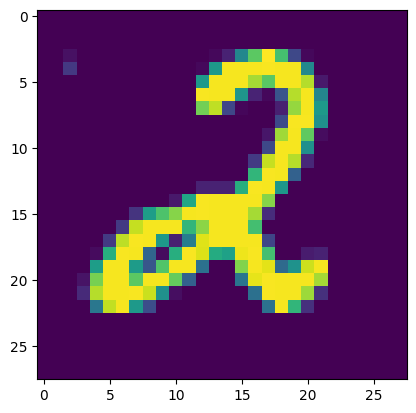

In [88]:
plt.imshow(df.iloc[28576, 1:].values.reshape(28,28))

In [89]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1504,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


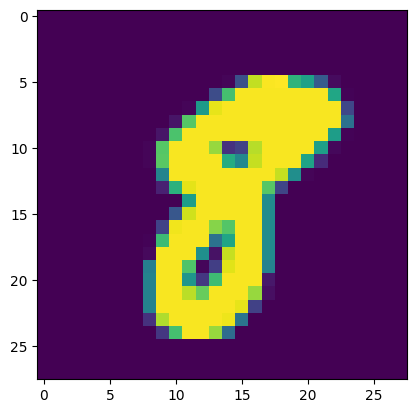

In [90]:
plt.imshow(df.iloc[878, 1:].values.reshape(28,28))

In [91]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
clf = KNeighborsClassifier()

In [97]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
import time
start_time = time.time()
y_pred = clf.predict(X_test)
time.time() - start_time

14.15333867073059

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=250)

In [104]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [105]:
X_train_trf.shape

(33600, 250)

In [106]:
clf = KNeighborsClassifier()
clf.fit(X_train_trf, y_train)
start_time = time.time()
y_pred = clf.predict(X_test_trf)
print(time.time() - start_time)
accuracy_score(y_test, y_pred)

3.0953891277313232


0.9484523809523809

In [107]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [108]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [109]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [110]:
fig = px.scatter_3d(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 z = X_train_trf[:,2],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [111]:
# Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023378, 26.74459569])

In [112]:
# Eigen Vectors
pca.components_

array([[-3.06402578e-18, -1.56889898e-18,  8.48352226e-21, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.16189934e-17, -1.71596605e-17,  1.57367615e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 8.76461775e-17,  1.58580517e-17, -1.21502974e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [113]:

pca.components_.shape

(3, 784)

In [114]:
# (33600, 784) . (784, 3) => (33600, 3)
X_train_trf.shape

(33600, 3)

In [115]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [116]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [117]:
pca.components_.shape

(784, 784)

In [118]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

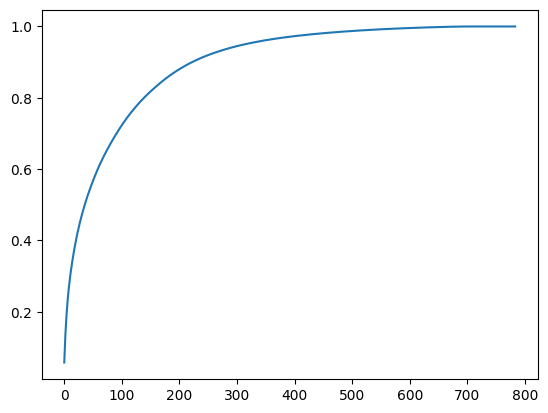

In [119]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))